## Week three - Polynomial Regression

<p>First, import necessary libraries.</p>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

### Create a dataframe representing a polynomial function given a feature and degree

In [3]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature ** power
    return poly_dataframe

### Load the necessary data

In [4]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort(['sqft_living','price'])

/Users/anthony/py_virtual_environments/uw-machine-learning/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [5]:
#Specity the l2 penalty
l2_small_penalty = 1.5e-5

### Train a linear model using the small l2 penalty above

In [6]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [7]:
model.coef_

array([  1.24873306e+02,  -4.77376011e-02,   3.01446238e-05,
        -2.44419942e-09,  -1.94153675e-13,   8.54085686e-18,
         1.51142121e-21,   8.27979094e-26,   6.52603100e-31,
        -3.27895017e-34,  -3.87962315e-38,  -2.72437650e-42,
        -1.07790800e-46,   3.78242694e-51,   1.39790296e-54])

### Read the four subsets and apply another small l2 penalty to observe overfitting

In [8]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [9]:
l2_small_penalty=1e-9

In [13]:
poly15_set1 = polynomial_dataframe(set_1['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model_set1 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model_set1.fit(poly15_set1, set_1['price'])

poly15_set2 = polynomial_dataframe(set_2['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model_set2 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model_set2.fit(poly15_set2, set_2['price'])

poly15_set3 = polynomial_dataframe(set_3['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model_set3 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model_set3.fit(poly15_set3, set_3['price'])

poly15_set4 = polynomial_dataframe(set_4['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model_set4 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model_set4.fit(poly15_set4, set_4['price'])

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

### Plot the four data sets

array([  5.44669412e+02,  -3.55447619e-01,   1.22446388e-04,
        -1.17175329e-08,  -3.90512409e-13,  -1.39075962e-17,
         1.47860249e-20,   6.87492005e-25,  -7.57203941e-29,
        -1.04097313e-32,  -3.71844036e-37,   3.39989302e-41,
         5.56592010e-45,   2.53761338e-49,  -3.35152887e-53])

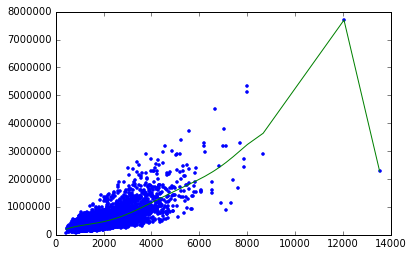

In [28]:
plt.plot(poly15_set1['power_1'],set_1['price'],'.',
poly15_set1['power_1'], model_set1.predict(poly15_set1[list(poly15_set1.columns)].values),'-')
model_set1.coef_

array([  8.59362635e+02,  -8.18118230e-01,   4.28879927e-04,
        -9.12770340e-08,  -2.69605373e-12,   3.73980452e-15,
        -1.42712002e-19,  -6.30794595e-23,  -1.44559747e-27,
         7.44321194e-31,   9.25866217e-35,   3.28019989e-41,
        -1.29543525e-42,  -1.38781284e-46,   1.66546468e-50])

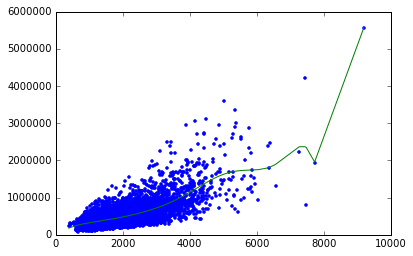

In [29]:
plt.plot(poly15_set2['power_1'],set_2['price'],'.',
poly15_set2['power_1'], model_set2.predict(poly15_set2[list(poly15_set2.columns)].values),'-')
model_set2.coef_

array([ -7.55395925e+02,   9.75579503e-01,  -4.58945991e-04,
         7.77958103e-08,   7.15013317e-12,  -2.88601974e-15,
        -2.13677954e-20,   3.38085194e-23,   2.19178225e-27,
        -1.97067800e-31,  -4.15993159e-35,  -1.80196163e-39,
         3.19071168e-43,   5.08456882e-47,  -3.93304245e-51])

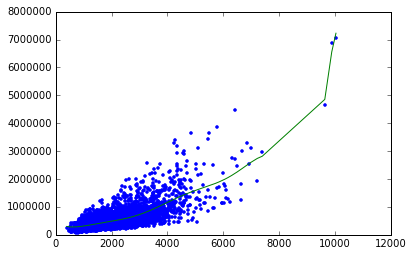

In [30]:
plt.plot(poly15_set3['power_1'],set_3['price'],'.',
poly15_set3['power_1'], model_set3.predict(poly15_set3[list(poly15_set3.columns)].values),'-')
model_set3.coef_

array([  1.11944567e+03,  -9.83760152e-01,   3.38770855e-04,
         3.60377350e-08,  -4.37814036e-11,   5.77191682e-15,
         7.66795213e-19,  -9.49297482e-23,  -1.96030846e-26,
        -2.10880322e-32,   3.31005062e-34,   3.47733884e-38,
        -2.43039180e-42,  -8.79553440e-46,   6.44569757e-50])

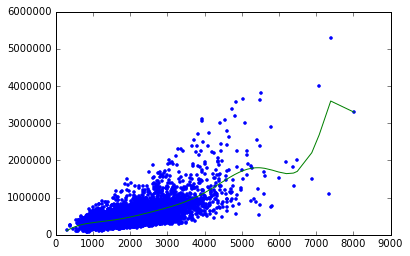

In [32]:
plt.plot(poly15_set4['power_1'],set_4['price'],'.',
poly15_set4['power_1'], model_set4.predict(poly15_set4[list(poly15_set4.columns)].values),'-')
model_set4.coef_

### Now fit models using a large l2 penalty

In [33]:
l2_large_penalty=1.23e2

In [34]:
poly15_set1 = polynomial_dataframe(set_1['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model_set1 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model_set1.fit(poly15_set1, set_1['price'])

poly15_set2 = polynomial_dataframe(set_2['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model_set2 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model_set2.fit(poly15_set2, set_2['price'])

poly15_set3 = polynomial_dataframe(set_3['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model_set3 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model_set3.fit(poly15_set3, set_3['price'])

poly15_set4 = polynomial_dataframe(set_4['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model_set4 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model_set4.fit(poly15_set4, set_4['price'])

Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

array([  2.32806803e+00,   3.53621608e-04,   3.31969692e-08,
         2.00082477e-12,   1.11492559e-16,   6.57786122e-21,
         4.12939525e-25,   2.70393755e-29,   1.81614763e-33,
         1.23824277e-37,   8.51872481e-42,   5.89455598e-46,
         4.09542560e-50,   2.85464889e-54,   1.99547476e-58])

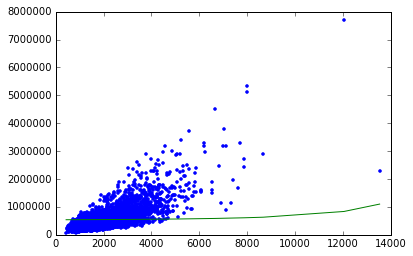

In [35]:
plt.plot(poly15_set1['power_1'],set_1['price'],'.',
poly15_set1['power_1'], model_set1.predict(poly15_set1[list(poly15_set1.columns)].values),'-')
model_set1.coef_

array([  2.09756903e+00,   3.90817483e-04,   6.67189944e-08,
         8.90002997e-12,   9.72639877e-16,   9.69733682e-20,
         9.50564475e-24,   9.44491031e-28,   9.57191338e-32,
         9.86945155e-36,   1.03101115e-39,   1.08729784e-43,
         1.15453748e-47,   1.23211305e-51,   1.31986696e-55])

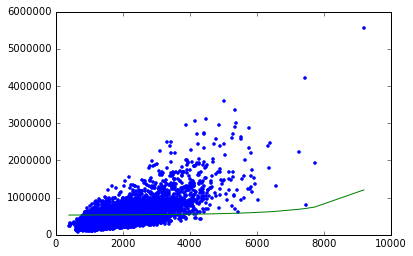

In [37]:
plt.plot(poly15_set2['power_1'],set_2['price'],'.',
poly15_set2['power_1'], model_set2.predict(poly15_set2[list(poly15_set2.columns)].values),'-')
model_set2.coef_

array([  2.28906258e+00,   4.12472190e-04,   6.08835345e-08,
         6.58572163e-12,   6.15278155e-16,   5.64446634e-20,
         5.28834396e-24,   5.07091402e-28,   4.94657273e-32,
         4.88043809e-36,   4.85009106e-40,   4.84161534e-44,
         4.84635021e-48,   4.85883628e-52,   4.87558469e-56])

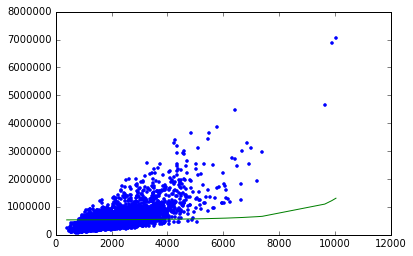

In [38]:
plt.plot(poly15_set3['power_1'],set_3['price'],'.',
poly15_set3['power_1'], model_set3.predict(poly15_set3[list(poly15_set3.columns)].values),'-')
model_set3.coef_

array([  2.08596194e+00,   4.05035772e-04,   7.46864647e-08,
         1.13096608e-11,   1.45864442e-15,   1.73561251e-19,
         2.01609632e-23,   2.34605255e-27,   2.75636073e-31,
         3.27043069e-35,   3.91046855e-39,   4.70118041e-43,
         5.67212304e-47,   6.85958087e-51,   8.30843630e-55])

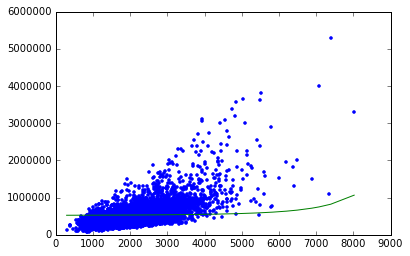

In [39]:
plt.plot(poly15_set4['power_1'],set_4['price'],'.',
poly15_set4['power_1'], model_set4.predict(poly15_set4[list(poly15_set4.columns)].values),'-')
model_set4.coef_

### Now use cross validation to select the l2 penalty

In [40]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [41]:
#Print start and end indices for size k
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [57]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    n = len(data)
    sum_squares = 0 
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        validation_set = data[start:end+1]
        training_set = data[0:start].append(data[end+1:n])
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        model.fit(training_set, training_set[output])
        columns = data.columns.values
        sum_squares = sum_squares + sum((model.predict(validation_set[list(columns)].values) - validation_set['price'].values) ** 2)
    avg_error = sum_squares/k
    return avg_error

### Generate a series of l2 penalty candidates

In [67]:
l2_candidates = np.logspace(3, 9, num=13)

In [69]:
data = polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)
data['price'] = train_valid_shuffled['price']
for candidate in l2_candidates:
    print str(candidate) + ' - ' + str(k_fold_cross_validation(10, candidate, data, 'price'))

1000.0 2.64449176172e+14
3162.27766017 2.65525075029e+14
10000.0 2.65871201934e+14
31622.7766017 2.659812601e+14
100000.0 2.66016124304e+14
316227.766017 2.66027155422e+14
1000000.0 2.66030644378e+14
3162277.66017 2.66031747743e+14
10000000.0 2.66032096664e+14
31622776.6017 2.66032207003e+14
100000000.0 2.66032241896e+14
316227766.017 2.6603225293e+14
1000000000.0 2.66032256419e+14


### Finally, train a model on all training data using the best above penalty

In [61]:
training_data = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [62]:
poly_training = polynomial_dataframe(training_data['sqft_living'], 15)
poly_training['price'] = training_data['price']

poly_test = polynomial_dataframe(test_data['sqft_living'], 15)
poly_test['price'] = test_data['price']

In [63]:
model = linear_model.Ridge(alpha=1000, normalize=True)
model.fit(poly_training, poly_training['price'])

columns = data.columns.values
sum((model.predict(poly_test[list(columns)].values) - poly_test['price'].values) ** 2)

283191654624933.62